In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC  
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from keras.layers.core import Dense
from keras.models import Model
from keras.layers import concatenate,average,add,multiply
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten,Embedding,Reshape
from keras.layers import Input
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model
import tensorflow as tf

Using TensorFlow backend.


In [2]:
data_dir="/home/james/data/Malware"
data_csv=data_dir + "/train.csv"


In [3]:
df = pd.read_csv(data_csv,low_memory=False)

In [4]:
# Get rid of bad columns
# reference = https://www.kaggle.com/jiegeng94/everyone-do-this-at-the-beginning
remove_cols = ['DefaultBrowsersIdentifier','PuaMode', 'Census_ProcessorClass', 'Census_IsWIMBootEnabled', 'IsBeta', 'Census_IsFlightsDisabled', 'Census_IsFlightingInternal', 'AutoSampleOptIn', 'Census_ThresholdOptIn', 'SMode', 'Census_IsPortableOperatingSystem', 'Census_DeviceFamily', 'UacLuaenable', 'Census_IsVirtualDevice', 'Platform', 'Census_OSSkuName', 'Census_OSInstallLanguageIdentifier', 'Processor']

df.drop(remove_cols, axis=1, inplace=True)

In [5]:
# Get Labels
labels = df['HasDetections']
IDS = df['MachineIdentifier']

It can be seen that the label categories are almost equal.

In [6]:
# Remove the labels from the dataframe
df = df.drop(['HasDetections'], axis=1)
df = df.drop(['MachineIdentifier'], axis=1)

# Get Columns in Variable
columns = list(df.columns.values)


In [7]:
#for column in columns:
#    if column == "MachineIdentifier":
#        next
#    if column == "HasDetections":
#        next
#    df[column] = pd.factorize(df[column])[0]
    

In [8]:
print(df.shape)

(8921483, 63)


In [9]:
trans_dict = {
    '˙˙˙': 'unknown', 'unkn': 'unknown', np.nan: 'unknown'
}
df.replace({'Census_InternalBatteryType': trans_dict}, inplace=True)



In [10]:
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'NoExist'
}
df.replace({'SmartScreen': trans_dict}, inplace=True)



In [11]:
df.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)

In [12]:
df.fillna(0, inplace=True)

In [13]:
for column in columns:
    if column == "MachineIdentifier":
        next
    if column == "HasDetections":
        next
    df[column] = pd.factorize(df[column])[0]

In [14]:
clf = ExtraTreesClassifier(n_estimators=50,n_jobs=3,max_depth=10).fit(df, labels)

In [15]:
clf.feature_importances_
rfmodel = SelectFromModel(clf, prefit=True)
rf_features = rfmodel.get_support(indices=True)

for i in range(len(rf_features)):
    print(rf_features[i],":",columns[rf_features[i]])
    
rf_df = rfmodel.transform(df)

1 : EngineVersion
2 : AppVersion
3 : AvSigVersion
4 : RtpStateBitfield
5 : IsSxsPassiveMode
6 : AVProductStatesIdentifier
7 : AVProductsInstalled
8 : AVProductsEnabled
21 : IsProtected
23 : SmartScreen
44 : Census_OSArchitecture
49 : Census_OSInstallTypeName
53 : Census_ActivationChannel
58 : Census_IsTouchEnabled
60 : Census_IsAlwaysOnAlwaysConnectedCapable
61 : Wdft_IsGamer


In [16]:
varkmodel = VarianceThreshold(1000).fit(df)
vark_features = varkmodel.get_support(indices=True)
print(len(vark_features))
for i in range(len(vark_features)):
    print(vark_features[i],":",columns[vark_features[i]])

15
3 : AvSigVersion
6 : AVProductStatesIdentifier
10 : CountryIdentifier
11 : CityIdentifier
19 : OsBuildLab
26 : Census_OEMNameIdentifier
27 : Census_OEMModelIdentifier
30 : Census_ProcessorModelIdentifier
31 : Census_PrimaryDiskTotalCapacity
33 : Census_SystemVolumeTotalCapacity
35 : Census_TotalPhysicalRAM
37 : Census_InternalPrimaryDiagonalDisplaySizeInInches
42 : Census_InternalBatteryNumberOfCharges
43 : Census_OSVersion
56 : Census_FirmwareVersionIdentifier


In [17]:
selectkmodel = SelectKBest(chi2, k=16).fit(df, labels)
selectk_features = selectkmodel.get_support(indices=True)
for i in range(len(selectk_features)):
    print(selectk_features[i],":",columns[selectk_features[i]])

3 : AvSigVersion
6 : AVProductStatesIdentifier
11 : CityIdentifier
19 : OsBuildLab
26 : Census_OEMNameIdentifier
27 : Census_OEMModelIdentifier
30 : Census_ProcessorModelIdentifier
31 : Census_PrimaryDiskTotalCapacity
33 : Census_SystemVolumeTotalCapacity
35 : Census_TotalPhysicalRAM
37 : Census_InternalPrimaryDiagonalDisplaySizeInInches
38 : Census_InternalPrimaryDisplayResolutionHorizontal
39 : Census_InternalPrimaryDisplayResolutionVertical
42 : Census_InternalBatteryNumberOfCharges
47 : Census_OSBuildRevision
56 : Census_FirmwareVersionIdentifier


In [18]:
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)

/usr/local/Anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
rf_df = rfmodel.transform(df)
print(rf_df.shape)

var_df = varkmodel.transform(df)
print(var_df.shape)

sk_df = selectkmodel.transform(df)
print(sk_df.shape)

(8921483, 16)
(8921483, 15)
(8921483, 16)


In [20]:
rf_shape = rf_df.shape[1]
var_shape = var_df.shape[1]
skx_shape = sk_df.shape[1]

# Three Inputs
inputA = Input(shape=(rf_shape,))
inputB = Input(shape=(var_shape,))
inputC = Input(shape=(skx_shape,))


# The First Branch
x = Dense(32, activation="relu")(inputA)
x = Dense(32, activation="relu")(x)
x = Dense(24, activation="relu")(x)
x = Dense(24, activation="relu")(x)
x = Dense(16, activation="relu")(x)
x = Dense(16, activation="relu")(x)
x = Dense(16, activation="relu")(x)
x = Dense(8, activation="relu")(x)
x = Dense(8, activation="relu")(x)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)
 
# The Second Branch
y = Dense(32, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(24, activation="relu")(y)
y = Dense(24, activation="relu")(y)
y = Dense(16, activation="relu")(y)
y = Dense(16, activation="relu")(y)
y = Dense(16, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)
 
# The Third Branch
z = Dense(32, activation="relu")(inputC)
z = Dense(32, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(16, activation="relu")(z)
z = Dense(16, activation="relu")(z)
z = Dense(16, activation="relu")(z)
z = Dense(8, activation="relu")(z)
z = Dense(8, activation="relu")(z)
z = Dense(8, activation="relu")(z)
z = Model(inputs=inputC, outputs=z)
    
# Combine all three layers
combined = concatenate([x.output, y.output,z.output])
 
# Build the Output Layers
zed = Dense(128, activation="relu")(combined)
zed = Dense(96, activation="relu")(zed)
zed = Dense(64, activation="relu")(zed)
zed = Dense(32, activation="relu")(zed)
zed = Dense(16, activation="relu")(zed)
zed = Dense(1, activation="sigmoid")(zed)
 
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[x.input, y.input,z.input], outputs=zed)

In [21]:
filepath = data_dir + '/dense_siamese_submission_weights.hdf5'

checkpoint = ModelCheckpoint(filepath, 
                             monitor="loss",
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

callbacks_list = [checkpoint]

model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['mse','accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 16)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 15)           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 16)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 32)           544         input_1[0][0]                    
__________________________________________________________________________________________________
dense_11 (

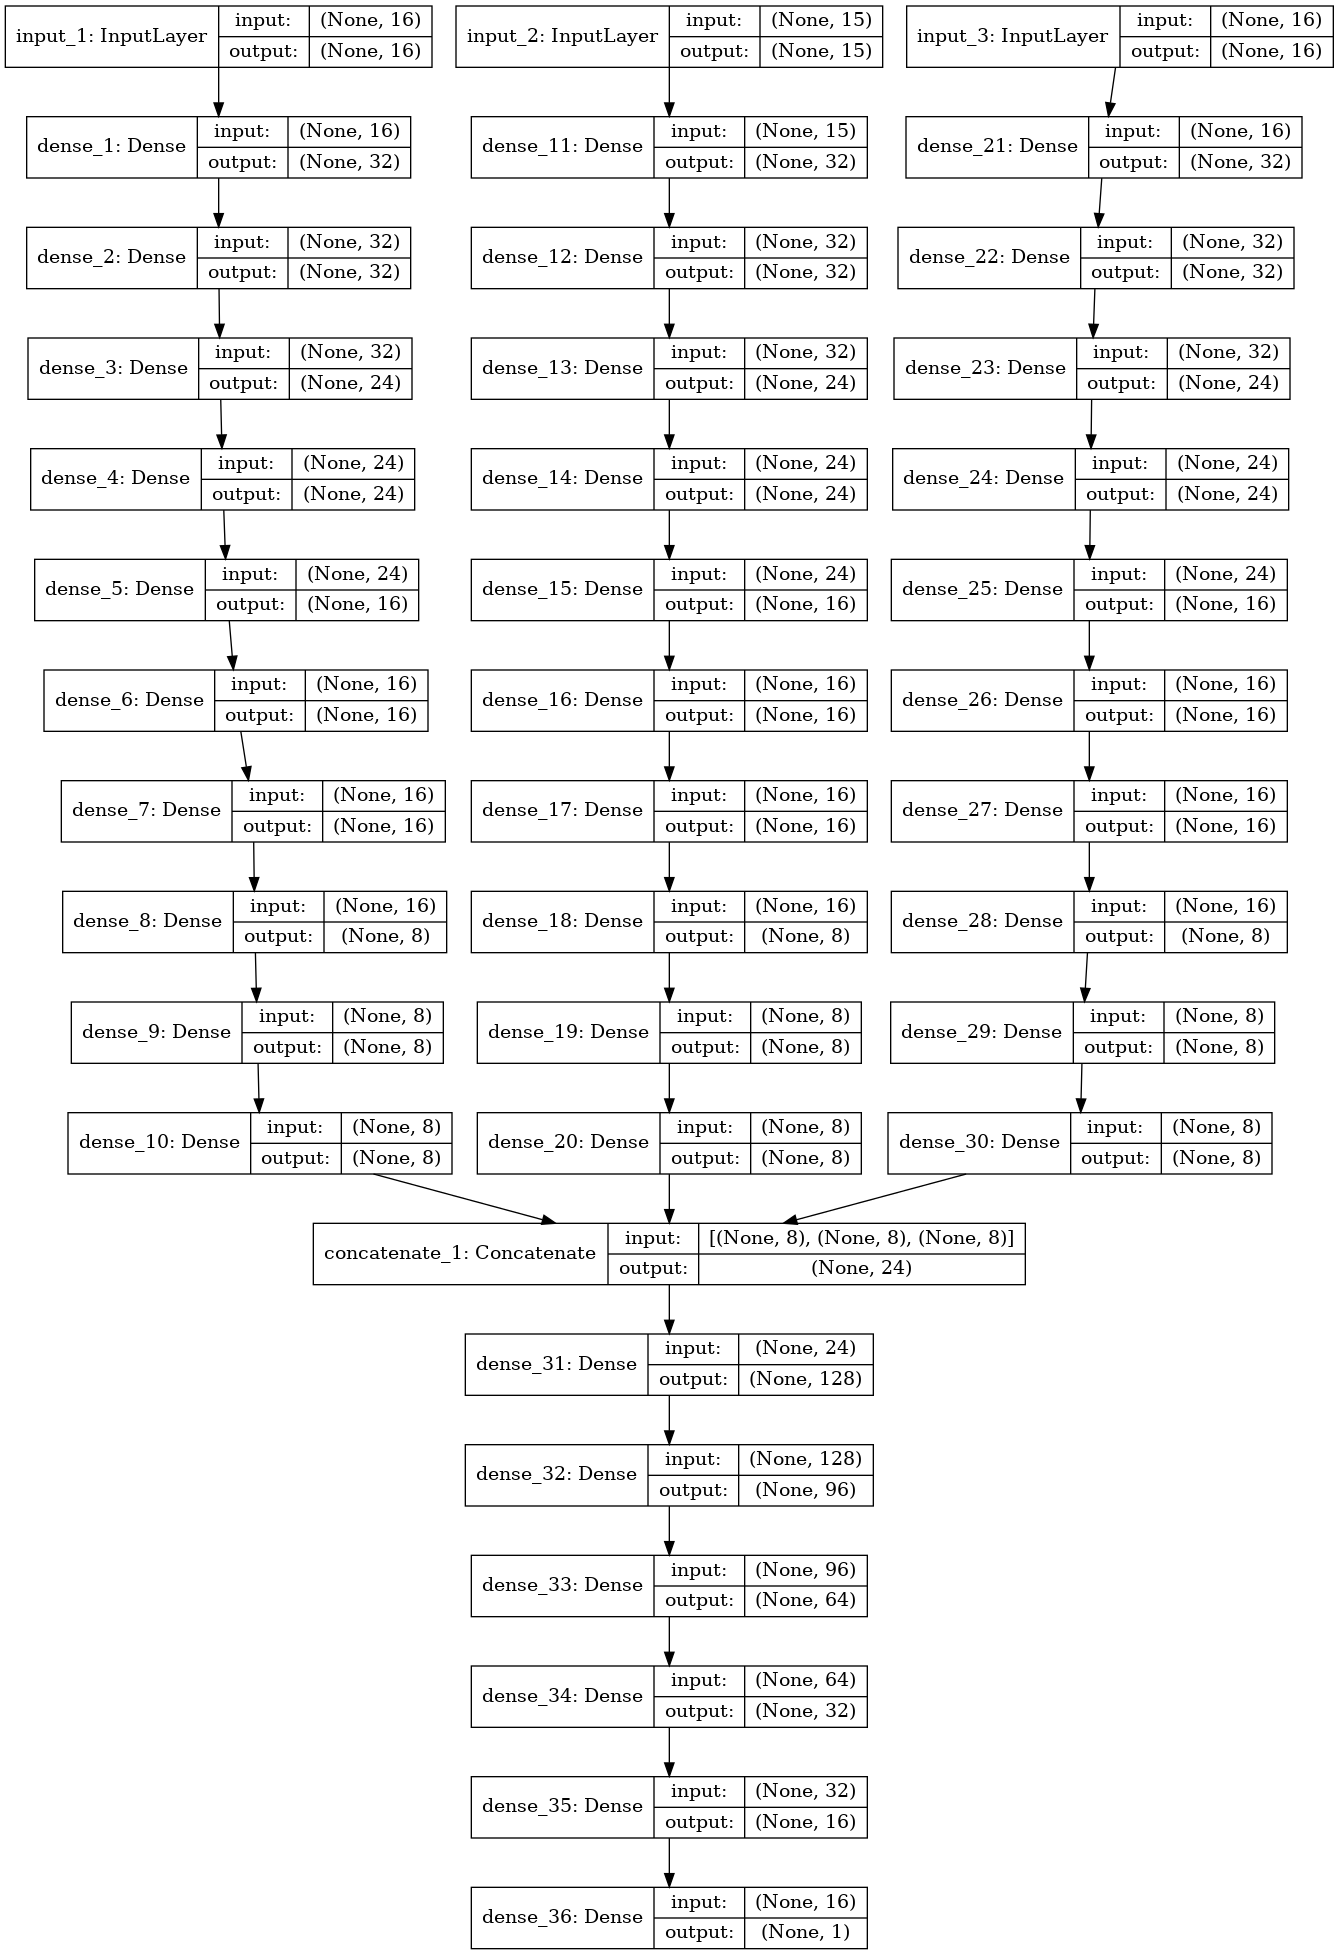

In [22]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [23]:
# Fit the model
model.load_weights(filepath)
history = model.fit([rf_df,var_df,sk_df], labels, 
                    epochs=1500, 
                    shuffle=True,
                    batch_size=20000,
                    callbacks=callbacks_list)


# Before Scaler 
# Epoch 136 loss: 0.6271 - mean_squared_error: 0.2196 - acc: 0.6364

# After Scaler
# Epoch 500 loss: 0.6139 - mean_squared_error: 0.2138 - acc: 0.6511

Epoch 1/1500
8921483/8921483 [==============================] - 67s 8us/step - loss: 0.6236 - mean_squared_error: 0.2180 - acc: 0.6416

Epoch 00001: loss improved from inf to 0.62360, saving model to /home/james/data/Malware/dense_siamese_submission_weights.hdf5
Epoch 2/1500
8921483/8921483 [==============================] - 65s 7us/step - loss: 0.6235 - mean_squared_error: 0.2180 - acc: 0.6416

Epoch 00002: loss improved from 0.62360 to 0.62353, saving model to /home/james/data/Malware/dense_siamese_submission_weights.hdf5
Epoch 3/1500
8921483/8921483 [==============================] - 65s 7us/step - loss: 0.6236 - mean_squared_error: 0.2180 - acc: 0.6415

Epoch 00003: loss did not improve from 0.62353
Epoch 4/1500
8921483/8921483 [==============================] - 65s 7us/step - loss: 0.6236 - mean_squared_error: 0.2180 - acc: 0.6416

Epoch 00004: loss did not improve from 0.62353
Epoch 5/1500
8921483/8921483 [==============================] - 65s 7us/step - loss: 0.6235 - mean_squar

Epoch 37/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6230 - mean_squared_error: 0.2177 - acc: 0.6424

Epoch 00037: loss improved from 0.62302 to 0.62295, saving model to /home/james/data/Malware/dense_siamese_submission_weights.hdf5
Epoch 38/1500
8921483/8921483 [==============================] - 75s 8us/step - loss: 0.6229 - mean_squared_error: 0.2177 - acc: 0.6426

Epoch 00038: loss improved from 0.62295 to 0.62294, saving model to /home/james/data/Malware/dense_siamese_submission_weights.hdf5
Epoch 39/1500
8921483/8921483 [==============================] - 76s 9us/step - loss: 0.6229 - mean_squared_error: 0.2177 - acc: 0.6425

Epoch 00039: loss improved from 0.62294 to 0.62291, saving model to /home/james/data/Malware/dense_siamese_submission_weights.hdf5
Epoch 40/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6229 - mean_squared_error: 0.2177 - acc: 0.6425

Epoch 00040: loss improved from 0.62291 to 0.62290, saving 

8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6224 - mean_squared_error: 0.2175 - acc: 0.6431

Epoch 00074: loss improved from 0.62249 to 0.62244, saving model to /home/james/data/Malware/dense_siamese_submission_weights.hdf5
Epoch 75/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6225 - mean_squared_error: 0.2175 - acc: 0.6430

Epoch 00075: loss did not improve from 0.62244
Epoch 76/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6224 - mean_squared_error: 0.2175 - acc: 0.6431

Epoch 00076: loss improved from 0.62244 to 0.62243, saving model to /home/james/data/Malware/dense_siamese_submission_weights.hdf5
Epoch 77/1500
8921483/8921483 [==============================] - 64s 7us/step - loss: 0.6224 - mean_squared_error: 0.2175 - acc: 0.6431

Epoch 00077: loss improved from 0.62243 to 0.62239, saving model to /home/james/data/Malware/dense_siamese_submission_weights.hdf5
Epoch 78/1500
8921483/8921

8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6217 - mean_squared_error: 0.2171 - acc: 0.6439

Epoch 00148: loss did not improve from 0.62166
Epoch 149/1500
8921483/8921483 [==============================] - 64s 7us/step - loss: 0.6217 - mean_squared_error: 0.2172 - acc: 0.6439

Epoch 00149: loss did not improve from 0.62166
Epoch 150/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6217 - mean_squared_error: 0.2171 - acc: 0.6439

Epoch 00150: loss did not improve from 0.62166
Epoch 151/1500
8921483/8921483 [==============================] - 64s 7us/step - loss: 0.6217 - mean_squared_error: 0.2172 - acc: 0.6438

Epoch 00151: loss did not improve from 0.62166
Epoch 152/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6217 - mean_squared_error: 0.2171 - acc: 0.6440

Epoch 00152: loss did not improve from 0.62166
Epoch 153/1500
8921483/8921483 [==============================] - 64s 7us/step - loss: 0.6

Epoch 187/1500
8921483/8921483 [==============================] - 64s 7us/step - loss: 0.6213 - mean_squared_error: 0.2170 - acc: 0.6443

Epoch 00187: loss improved from 0.62134 to 0.62133, saving model to /home/james/data/Malware/dense_siamese_submission_weights.hdf5
Epoch 188/1500
8921483/8921483 [==============================] - 64s 7us/step - loss: 0.6213 - mean_squared_error: 0.2170 - acc: 0.6444

Epoch 00188: loss improved from 0.62133 to 0.62131, saving model to /home/james/data/Malware/dense_siamese_submission_weights.hdf5
Epoch 189/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6213 - mean_squared_error: 0.2170 - acc: 0.6444

Epoch 00189: loss improved from 0.62131 to 0.62129, saving model to /home/james/data/Malware/dense_siamese_submission_weights.hdf5
Epoch 190/1500
8921483/8921483 [==============================] - 64s 7us/step - loss: 0.6213 - mean_squared_error: 0.2170 - acc: 0.6443

Epoch 00190: loss did not improve from 0.62129
Epoch 19

8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6211 - mean_squared_error: 0.2169 - acc: 0.6446

Epoch 00225: loss did not improve from 0.62106
Epoch 226/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6211 - mean_squared_error: 0.2169 - acc: 0.6446

Epoch 00226: loss did not improve from 0.62106
Epoch 227/1500
8921483/8921483 [==============================] - 64s 7us/step - loss: 0.6211 - mean_squared_error: 0.2169 - acc: 0.6446

Epoch 00227: loss did not improve from 0.62106
Epoch 228/1500
8921483/8921483 [==============================] - 64s 7us/step - loss: 0.6211 - mean_squared_error: 0.2169 - acc: 0.6446

Epoch 00228: loss did not improve from 0.62106
Epoch 229/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6211 - mean_squared_error: 0.2169 - acc: 0.6446

Epoch 00229: loss improved from 0.62106 to 0.62106, saving model to /home/james/data/Malware/dense_siamese_submission_weights.hdf5
Epoch 

Epoch 306/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6207 - mean_squared_error: 0.2167 - acc: 0.6450

Epoch 00306: loss did not improve from 0.62064
Epoch 307/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6206 - mean_squared_error: 0.2167 - acc: 0.6451

Epoch 00307: loss improved from 0.62064 to 0.62060, saving model to /home/james/data/Malware/dense_siamese_submission_weights.hdf5
Epoch 308/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6207 - mean_squared_error: 0.2167 - acc: 0.6450

Epoch 00308: loss did not improve from 0.62060
Epoch 309/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6207 - mean_squared_error: 0.2167 - acc: 0.6450

Epoch 00309: loss did not improve from 0.62060
Epoch 310/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6207 - mean_squared_error: 0.2167 - acc: 0.6451

Epoch 00310: loss did not improve from

8921483/8921483 [==============================] - 64s 7us/step - loss: 0.6204 - mean_squared_error: 0.2166 - acc: 0.6453

Epoch 00388: loss did not improve from 0.62029
Epoch 389/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6203 - mean_squared_error: 0.2166 - acc: 0.6454

Epoch 00389: loss did not improve from 0.62029
Epoch 390/1500
8921483/8921483 [==============================] - 64s 7us/step - loss: 0.6203 - mean_squared_error: 0.2165 - acc: 0.6455

Epoch 00390: loss improved from 0.62029 to 0.62028, saving model to /home/james/data/Malware/dense_siamese_submission_weights.hdf5
Epoch 391/1500
8921483/8921483 [==============================] - 63s 7us/step - loss: 0.6203 - mean_squared_error: 0.2166 - acc: 0.6455

Epoch 00391: loss did not improve from 0.62028
Epoch 392/1500
8921483/8921483 [==============================] - 64s 7us/step - loss: 0.6203 - mean_squared_error: 0.2166 - acc: 0.6454

Epoch 00392: loss did not improve from 0.62028
Epoch 

KeyboardInterrupt: 

In [24]:
del df
del rf_df
del var_df
del sk_df

In [25]:
del test_csv
del testdf
del testrf_df
del testvar_df
del testsk_df

NameError: name 'test_csv' is not defined

In [26]:
test_csv=data_dir + "/test.csv"
testdf = pd.read_csv(test_csv,low_memory=False)

In [27]:
testdf.fillna(0, inplace=True)

remove_cols = ['DefaultBrowsersIdentifier','PuaMode', 'Census_ProcessorClass', 'Census_IsWIMBootEnabled', 'IsBeta', 'Census_IsFlightsDisabled', 'Census_IsFlightingInternal', 'AutoSampleOptIn', 'Census_ThresholdOptIn', 'SMode', 'Census_IsPortableOperatingSystem', 'Census_DeviceFamily', 'UacLuaenable', 'Census_IsVirtualDevice', 'Platform', 'Census_OSSkuName', 'Census_OSInstallLanguageIdentifier', 'Processor']

#testdf.drop(remove_cols, axis=1, inplace=True)

# Get Labels
test_IDS = testdf['MachineIdentifier']

testdf = testdf.drop(['MachineIdentifier'], axis=1)

trans_dict = {
    '˙˙˙': 'unknown', 'unkn': 'unknown', np.nan: 'unknown'
}

testdf.replace({'Census_InternalBatteryType': trans_dict}, inplace=True)

trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'NoExist'
}
testdf.replace({'SmartScreen': trans_dict}, inplace=True)

testdf.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)

testdf.fillna(0, inplace=True)

In [28]:
print(testdf.shape)

(7853253, 81)


In [29]:
new_testdf = pd.DataFrame()
for column in columns:
    if column == "MachineIdentifier":
        next
    if column == "HasDetections":
        next
    new_testdf[column] = pd.factorize(testdf[column])[0]

In [30]:
print(new_testdf.shape)

(7853253, 63)


In [31]:
testdf = scaler.transform(new_testdf)

testrf_df = rfmodel.transform(testdf)
print(testrf_df.shape)

testvar_df = varkmodel.transform(testdf)
print(testvar_df.shape)

testsk_df = selectkmodel.transform(testdf)
print(testsk_df.shape)

/usr/local/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


(7853253, 16)
(7853253, 15)
(7853253, 16)


In [32]:
model.load_weights(filepath)

In [33]:
predictions = model.predict([testrf_df,testvar_df,testsk_df],verbose=1)

7853253/7853253 [==============================] - 163s 21us/step


In [35]:
print(predictions.shape)
print(test_IDS.shape)
predictions = predictions.flatten()

(7853253, 1)
(7853253,)


In [41]:
data =  {'MachineIdentifier': test_IDS, 'HasDetections': predictions}
submission = pd.DataFrame(data,columns=['MachineIdentifier','HasDetections'])
print(predictions.shape,test_IDS.shape)

(7853253,) (7853253,)
0.58870083


In [45]:
submission.to_csv("/home/james/data/Malware/submission.csv",sep=',',index=False,header=True)